# Exploração dos dados

## Bibliotecas necessárias

Começamos importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

## Base de dados

Com isso, importamos a base de dados de um arquivo CSV, que foi préviamente tratado no `Excel`.

In [2]:
df = pd.read_csv("organizacoes_escoteiras.csv", sep=";", encoding="UTF-8")

## Transformação nos dados

Primeiro, verificamos as colunas do `dataframe`, para garantir que vamos trabalhar com os nomes corretos

In [3]:
df.columns

Index(['pais', 'mebros', 'nome_da_organizacao', 'ingresso_na_wosm',
       'organizacao_membro_fundada', 'admite'],
      dtype='object')

Podemos ver abaixo que há dados faltantes na base

In [4]:
df.iloc[39:45]

,pais,mebros,nome_da_organizacao,ingresso_na_wosm,organizacao_membro_fundada,admite
39,Croatia,"3,483",Savez izviđača Hrvatske,1993.0,1915.0,both
40,Curaçao,"1,143",Scouting Antiano,2016.0,1997.0,both
41,Sint Maarten,NaN,NaN,NaN,NaN,NaN
42,Caribbean Netherlands,NaN,NaN,NaN,NaN,NaN
43,Cyprus,"5,522",Cyprus Scouts Association,1961.0,1913.0,both
44,Czech Republic,"67,959","Junák - český skaut, z. s.",1922.0,1911.0,both


Realizamos abaixo uma tranformação nos dados, onde queremos uma contagem do número de países que passou a ter um órgão nacional escoteiro reconhecido, assim como aqueles nos quais o órgão nacional passou a fazer parte da [WOSM](https://www.scout.org/) (o órgão mundial). Devemos lembrar de não considerar os dados faltantes (`NaN`), pois eles surgiram por conta da formatação dos dados orginais.

In [5]:
data = {
    "ingresso_na_wosm": {},
    "organizacao_membro_fundada": {},
}
for index, line in df.dropna().iterrows():
    for key in data.keys():
        data[key][int(line[key])] = 0

for index, line in df.dropna().iterrows():
    for key in data.keys():
        data[key][int(line[key])] += 1


Agora, verificamos a menor data nos dados:

In [6]:
print("Organização membro fundada: ", end="")
print(min(list(data["organizacao_membro_fundada"].keys())))
print("Ingresso na WOSM: ", end="")
print(min(list(data["ingresso_na_wosm"].keys())))

Organização membro fundada: 1907
Ingresso na WOSM: 1922


Com isso, conseguimos obter abaixo os dados acumulados:

In [7]:
data = np.zeros((116,2))
for index, line in df.dropna().iterrows():
    data[int(line["ingresso_na_wosm"]) - 1907, 0] += 1
    data[int(line["organizacao_membro_fundada"]) - 1907, 1] += 1

data = pd.DataFrame(data, columns=["ingresso", "fundacao"], index=range(1907, 2023))

data["ingresso_cumulativo"] = 0
data["fundacao_cumulativa"] = 0

for index, line in data.iterrows():
    data.loc[index, "ingresso_cumulativo"] = data.loc[:index, "ingresso"].sum()
    data.loc[index, "fundacao_cumulativa"] = data.loc[:index, "fundacao"].sum()


## Exploração dos dados

Abaixo plotamos o gráfico de linhas onde observamos o número acumulado de países que tiveram um órgão nacional escoteiro reconhecido, e também o número acumulado de países cujo esse orgão escoteiro se associou a WOSM.

<AxesSubplot:>

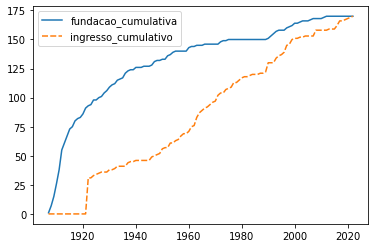

In [8]:

sns.lineplot(data=data[["fundacao_cumulativa", "ingresso_cumulativo"]])

Após ver o gráfico acima, separamos o que é mais adequado para trabalharmos, de acordo com a ideia inicial, realizamos mais um pequeno filtro nos dados e plotamos o gráfico final que deve ser utilizado para fazer o desenho:

<AxesSubplot:>

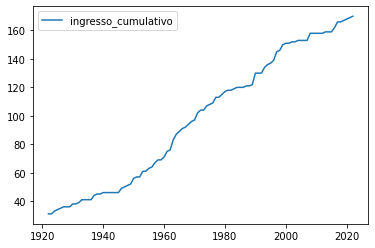

In [9]:
sns.lineplot(data=data.iloc[15:][["ingresso_cumulativo"]])